In [31]:
import pandas as pd
import matplotlib.pyplot as plt
# 1. Tạo DataFrame
data = {
    'Name': ["Mr. Harris", "Mrs. Bradley", "Miss. Laina", "Mrs. Heath", "Mr. William", "Mr. James", "Mr. Timothy",
             "Mrs. Oscar", "Mrs. Nicholas", "Miss. Marguerite", "Mr. William", "Miss. Hulda", "Mr. Lawrence", "Mr. Wilam"],
    'Height': [1.80, 1.61, 1.78, 1.74, 1.55, 1.9, 1.61, 1.40, 1.92, 1.77, 1.55, 1.85, 1.64, 1.77],
    'Weight': [90, 87, 64, 70, 100, 106, 82, 55, 77, 60, 100, 109, 80, 66],
    'AGE': [32, 45, 22, 52, 48, 21, 28, 69, 58, 21, 48, 33, 25, 70]
}
df = pd.DataFrame(data)

In [34]:
# 2. Hiển thị thông tin DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    14 non-null     object 
 1   Height  14 non-null     float64
 2   Weight  14 non-null     int64  
 3   AGE     14 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 580.0+ bytes
None


In [36]:
# 3. Tính giá trị trung bình của cột AGE
mean_age = df['AGE'].mean()
print("Giá trị trung bình của AGE:", mean_age)


Giá trị trung bình của AGE: 40.857142857142854


In [40]:
# 4. Nhóm dữ liệu theo cột Height và tính trung bình cột Weight
grouped = df.groupby('Height')['Weight'].mean()
print(grouped)


Height
1.40     55.0
1.55    100.0
1.61     84.5
1.64     80.0
1.74     70.0
1.77     63.0
1.78     64.0
1.80     90.0
1.85    109.0
1.90    106.0
1.92     77.0
Name: Weight, dtype: float64


In [43]:
# 5. Sắp xếp DataFrame theo cột Weight tăng dần
df_sorted = df.sort_values(by='Weight', ascending=True)
print(df_sorted)

                Name  Height  Weight  AGE
7         Mrs. Oscar    1.40      55   69
9   Miss. Marguerite    1.77      60   21
2        Miss. Laina    1.78      64   22
13         Mr. Wilam    1.77      66   70
3         Mrs. Heath    1.74      70   52
8      Mrs. Nicholas    1.92      77   58
12      Mr. Lawrence    1.64      80   25
6        Mr. Timothy    1.61      82   28
1       Mrs. Bradley    1.61      87   45
0         Mr. Harris    1.80      90   32
10       Mr. William    1.55     100   48
4        Mr. William    1.55     100   48
5          Mr. James    1.90     106   21
11       Miss. Hulda    1.85     109   33


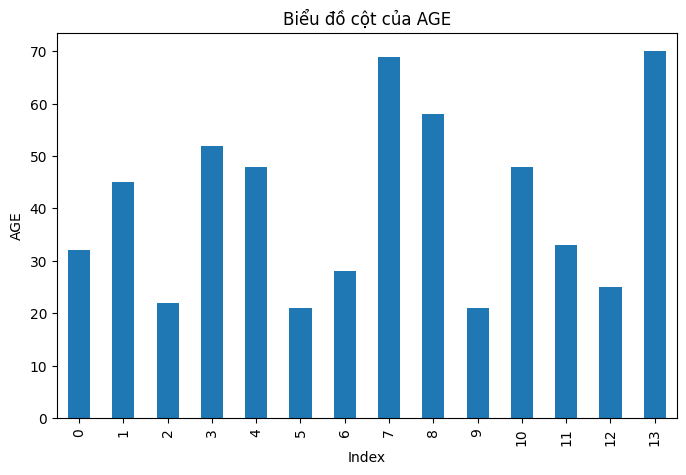

In [44]:
# 6. Vẽ biểu đồ cột cho AGE
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df['AGE'].plot(kind='bar', title='Biểu đồ cột của AGE')
plt.xlabel('Index')
plt.ylabel('AGE')
plt.show()

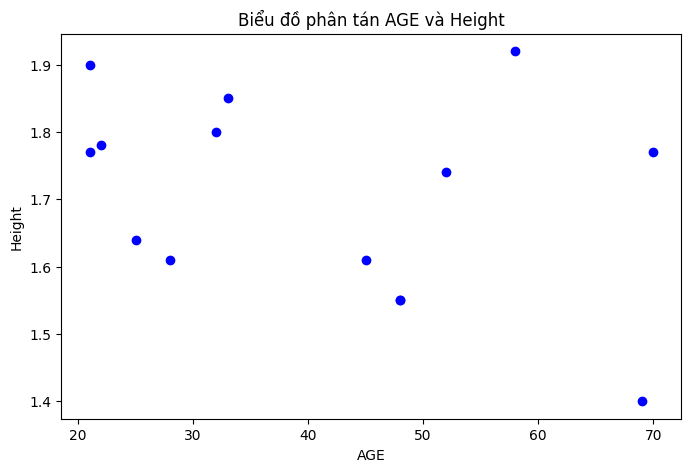

In [45]:
# 7. Vẽ biểu đồ phân tán cho AGE và Height
plt.figure(figsize=(8,5))
plt.scatter(df['AGE'], df['Height'], color='blue')
plt.xlabel('AGE')
plt.ylabel('Height')
plt.title('Biểu đồ phân tán AGE và Height')
plt.show()

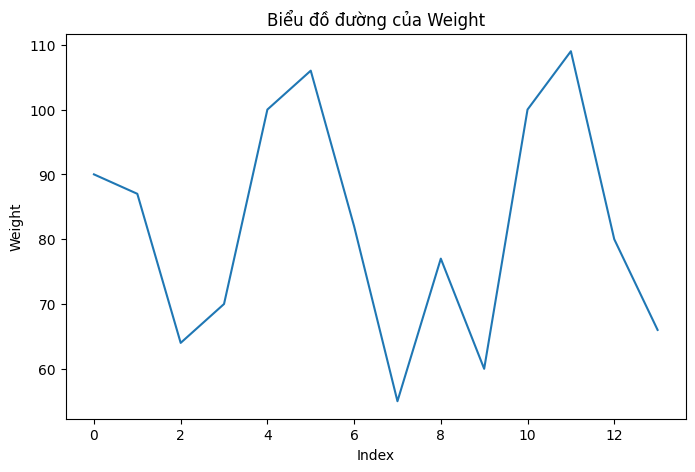

In [50]:
# 8.Vẽ biểu đồ đường cho cột Weight.
plt.figure(figsize=(8,5))
df['Weight'].plot(kind='line', title='Biểu đồ đường của Weight')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.show()

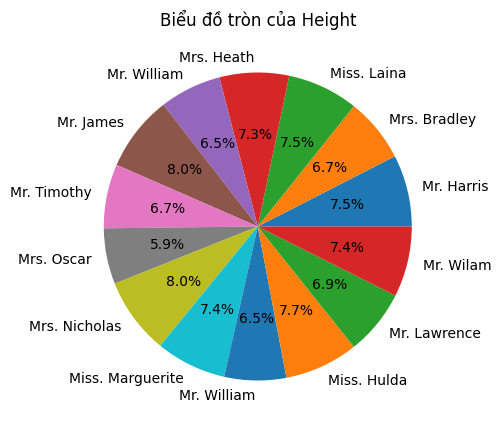

In [51]:
# 9.Vẽ biểu đồ tròn cho cột Height.
plt.figure(figsize=(8,5))
plt.pie(df['Height'], labels=df['Name'], autopct='%1.1f%%')
plt.title('Biểu đồ tròn của Height')
plt.show()

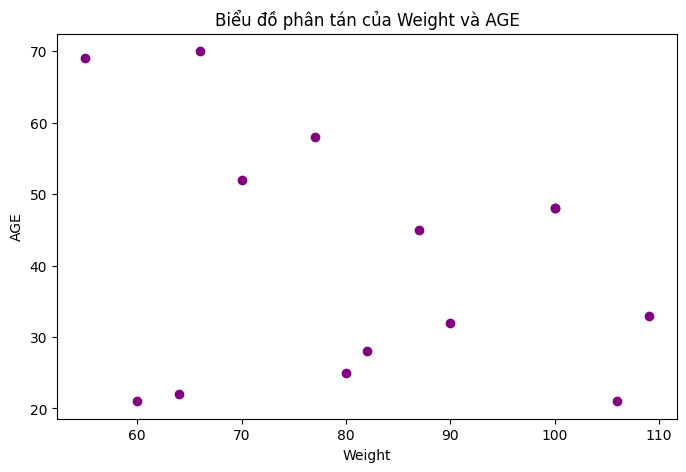

In [ ]:
# 10.Vẽ biểu đồ phân tán cho cột Weight và AGE
plt.figure(figsize=(8,5))
plt.scatter(df['Weight'], df['AGE'], color='purple')
plt.xlabel('Weight')
plt.ylabel('AGE')
plt.title('Biểu đồ phân tán của Weight và AGE')
plt.show()

In [60]:
# 11. Kiểm tra có giá trị NaN nào trong DataFame không
print(df.isnull().sum())

Name      0
Height    0
Weight    0
AGE       0
dtype: int64


In [61]:
# 12. Loại bỏ các hàng trùng lặp dựa trên cột 'Name'
df_no_duplicates = df.drop_duplicates(subset=['Name'], keep='first')
print(df_no_duplicates)

                Name  Height  Weight  AGE
0         Mr. Harris    1.80      90   32
1       Mrs. Bradley    1.61      87   45
2        Miss. Laina    1.78      64   22
3         Mrs. Heath    1.74      70   52
4        Mr. William    1.55     100   48
5          Mr. James    1.90     106   21
6        Mr. Timothy    1.61      82   28
7         Mrs. Oscar    1.40      55   69
8      Mrs. Nicholas    1.92      77   58
9   Miss. Marguerite    1.77      60   21
11       Miss. Hulda    1.85     109   33
12      Mr. Lawrence    1.64      80   25
13         Mr. Wilam    1.77      66   70


In [ ]:
# 13. Thay thế các giá trị AGE > 40 bằng giá trị trung bình của cột đó
mean_age = df["AGE"].mean() 
df["AGE"] = df["AGE"].apply(lambda x: mean_age if x > 40 else x)


In [81]:
# 14.Tạo cột cs_BMI
df["cs_BMI"] = df["Weight"] / (df["Height"] ** 2)

In [82]:
# 15 Phân loại BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 0  
    elif 18.5 <= bmi <= 22.9:
        return 1  
    elif 23 <= bmi <= 24.9:
        return 2  
    else:
        return 3 
df["Phan_Loai"] = df["cs_BMI"].apply(classify_bmi)    

In [83]:
# 16.Chuẩn hóa cột cs_BMI
df["cs_BMI"] = (df["cs_BMI"] - df["cs_BMI"].min()) / (df["cs_BMI"].max() - df["cs_BMI"].min())


In [6]:
import pandas as pd

# Tạo data
data = {'Name': ["Mr. Harris", "Mrs. Bradley", "Miss. Laina", "Mrs. Heath", "Mr. William", "Mr. James", "Mr. Timothy","Mrs. Oscar", "Mrs. Nicholas", "Miss. Marguerite", "Mr. William", "Miss. Hulda", "Mr. Lawrence", "Mr. Wilam"]}
df = pd.DataFrame(data)

# Hàm xác định giới tính
def get_gender(name):
    if "Mr." in name:
        return "male"
    elif "Mrs." in name:
        return "female"
    elif "Miss." in name:
        return "female"
    else:
        return "unknown"

# Xác định giới tính và lưu vào cột 'GT'
df["GT"] = df["Name"].apply(get_gender)

# Xóa các từ "Mr.", "Mrs.", "Miss." trong cột "Name"
df["Name"] = df["Name"].str.replace(r"Mr\.|Mrs\.|Miss\.", "", regex=True).str.strip()

# In kết quả
print(df)


          Name      GT
0       Harris    male
1      Bradley  female
2        Laina  female
3        Heath  female
4      William    male
5        James    male
6      Timothy    male
7        Oscar  female
8     Nicholas  female
9   Marguerite  female
10     William    male
11       Hulda  female
12    Lawrence    male
13       Wilam    male


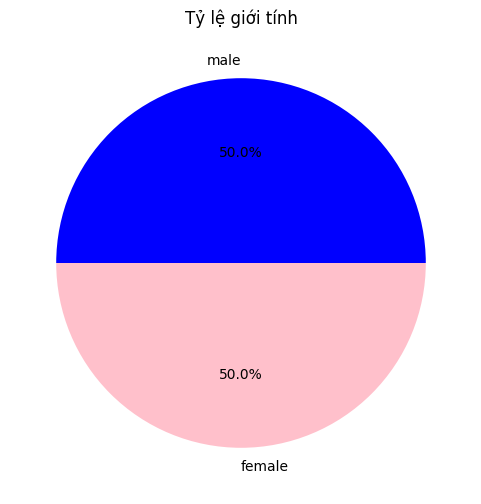

In [8]:
import matplotlib.pyplot as plt

# Assuming you already have the 'df' DataFrame loaded
gender_counts = df["GT"].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.1f%%", colors=['blue', 'pink'])
plt.title("Tỷ lệ giới tính")
plt.show()


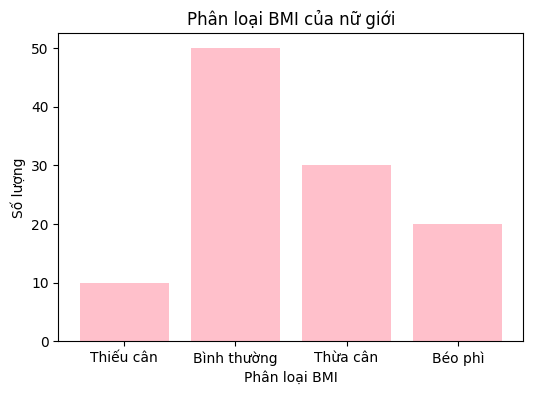

In [12]:
# 19. Trực quan hóa dữ liệu người nữ trên Phan_Loai
import pandas as pd
import matplotlib.pyplot as plt

data = {'Category': ['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì'],
        'Count': [10, 50, 30, 20]}  

female_df = pd.DataFrame(data)
female_df.set_index('Category', inplace=True)

plt.figure(figsize=(6, 4))
plt.bar(female_df.index, female_df['Count'], color='pink')
plt.xlabel("Phân loại BMI")
plt.ylabel("Số lượng")
plt.title("Phân loại BMI của nữ giới")
plt.xticks([0, 1, 2, 3], ['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì'])
plt.show()
